<a href="https://colab.research.google.com/github/utkarshg1/Test1/blob/main/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment analysis with Keras
0 - Negative

1 - postitive

# Step 1 - Data Ingestion

In [1]:
url1 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/Restaurant_Reviews.tsv"
print(url1)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/Restaurant_Reviews.tsv


In [2]:
print("a\tb")

a	b


In [3]:
import pandas as pd

df = pd.read_csv(url1, sep="\t")
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


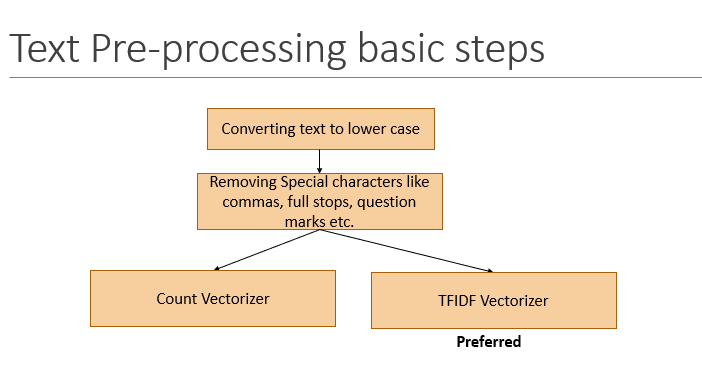

In [4]:
a = "Wow! This is AMAZING ..."
a.lower()

'wow! this is amazing ...'

In [5]:
import re
re.sub("[^a-z 0-9]", "",a.lower() )

'wow this is amazing '

In [6]:
import re

def preprocess_text(text: str) -> str:
  text = text.lower()
  text = re.sub("[^a-z 0-9]", "", text)
  return text.strip()

In [7]:
preprocess_text(a)

'wow this is amazing'

# Apply preprocessing on entire reviews

In [8]:
X = df["Review"].apply(preprocess_text)
X.head()

,Review
0,wow loved this place
1,crust is not good
2,not tasty and the texture was just nasty
3,stopped by during the late may bank holiday of...
4,the selection on the menu was great and so wer...


# Apply TFIDF Vectorizer

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_pre = tfidf.fit_transform(X).toarray()
X_pre

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
X_pre.shape

(1000, 2067)

# Dimensionality reduction with SVD

In [11]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=300)
X_pre_red = svd.fit_transform(X_pre)
X_pre_red

array([[ 0.11457856,  0.19021733,  0.29860513, ...,  0.06245725,
         0.05207844, -0.02311462],
       [ 0.20041515,  0.06219207,  0.10386265, ...,  0.03294273,
         0.02352534, -0.00595593],
       [ 0.248602  , -0.05947126, -0.09197254, ..., -0.02132688,
         0.00901004, -0.05282644],
       ...,
       [ 0.25745938,  0.21354302, -0.25268859, ...,  0.00589952,
        -0.00868107, -0.00730177],
       [ 0.21755074,  0.04422347, -0.07900024, ..., -0.02763975,
         0.0222443 ,  0.00563772],
       [ 0.22278543,  0.02689928, -0.02221585, ...,  0.04489013,
        -0.00336323,  0.01224455]])

In [12]:
X_pre_red.shape

(1000, 300)

In [13]:
Y = df["Liked"]
Y.head()

,Liked
0,1
1,0
2,0
3,1
4,1


In [14]:
Y.value_counts()

,count
Liked,
1,500
0,500


# Train test split

In [15]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    X_pre_red, Y, test_size=0.2, random_state=42
)

In [16]:
xtrain

array([[ 0.22714971, -0.13552749, -0.05020054, ..., -0.04061148,
         0.01651915,  0.0027554 ],
       [ 0.04699212,  0.01342239,  0.03451729, ..., -0.03193097,
         0.04724139, -0.03746108],
       [ 0.19705026, -0.13148614, -0.08873095, ..., -0.01716174,
        -0.00460638,  0.00882808],
       ...,
       [ 0.28454308,  0.11308598,  0.31554382, ..., -0.03061555,
        -0.02772645,  0.01718879],
       [ 0.16594076, -0.07105195, -0.05824826, ..., -0.00827052,
         0.0287268 , -0.04389545],
       [ 0.17456908,  0.04421883,  0.01479549, ..., -0.00388249,
         0.00490396,  0.00552666]])

In [17]:
ytrain.head()

,Liked
29,0
535,1
695,0
557,0
836,1


In [18]:
xtest

array([[ 7.69189231e-02,  1.34941590e-01, -7.03830863e-02, ...,
         3.22197759e-02, -1.81285496e-02,  3.97000466e-03],
       [ 2.54266004e-01, -7.50053994e-02, -3.37347156e-02, ...,
        -1.20663396e-02, -4.11601593e-03,  4.93057105e-03],
       [ 2.65741145e-01,  1.06919650e-02,  9.62323918e-02, ...,
         1.39326330e-02, -5.95204961e-03,  9.58279640e-03],
       ...,
       [ 1.49168849e-01,  1.66499909e-01,  2.20766318e-01, ...,
         3.20901278e-04, -2.20497597e-03,  1.28774214e-02],
       [ 1.46406258e-01,  2.12869450e-01, -2.16913284e-01, ...,
        -3.49697816e-02, -2.33136638e-02, -2.99366955e-02],
       [ 3.20891746e-01, -2.48193652e-02,  1.88372725e-02, ...,
        -3.18281133e-02, -1.65147346e-02,  1.67459824e-05]])

In [19]:
ytest.head()

,Liked
521,1
737,1
740,1
660,1
411,1


In [20]:
xtrain.shape

(800, 300)

In [21]:
xtrain.shape[1]

300

# Start building neural network

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [23]:
model = Sequential(
    layers = [
        Input(shape=(xtrain.shape[1],)),
        Dense(128, activation="relu", kernel_regularizer=l2(0.01)),
        Dropout(0.5),
        Dense(64, activation="relu", kernel_regularizer=l2(0.01)),
        Dropout(0.5),
        Dense(1, activation="sigmoid")
    ]
)

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        38,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,849 (183.00 KB)

 Trainable params: 46,849 (183.00 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [26]:
es = EarlyStopping(patience=10, restore_best_weights=True)

In [27]:
hist = model.fit(xtrain, ytrain, validation_split=0.1, epochs=100, callbacks=[es])

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 15s 151ms/step - accuracy: 0.4946 - loss: 3.0547 - val_accuracy: 0.6000 - val_loss: 2.2772
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5483 - loss: 2.0852 - val_accuracy: 0.4750 - val_loss: 1.5958
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5868 - loss: 1.4780 - val_accuracy: 0.5750 - val_loss: 1.1931
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5858 - loss: 1.1252 - val_accuracy: 0.5125 - val_loss: 0.9668
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6229 - loss: 0.9263 - val_accuracy: 0.5375 - val_loss: 0.8413
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6194 - loss: 0.8154 - val_accuracy: 0.5375 - val_loss: 0.7744
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7290 - loss: 0.7553 - val_accuracy: 0.6375 - val_loss: 0.7366
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7374 - loss: 0.7220 - val_accuracy: 0.67

# Plot the learning curve

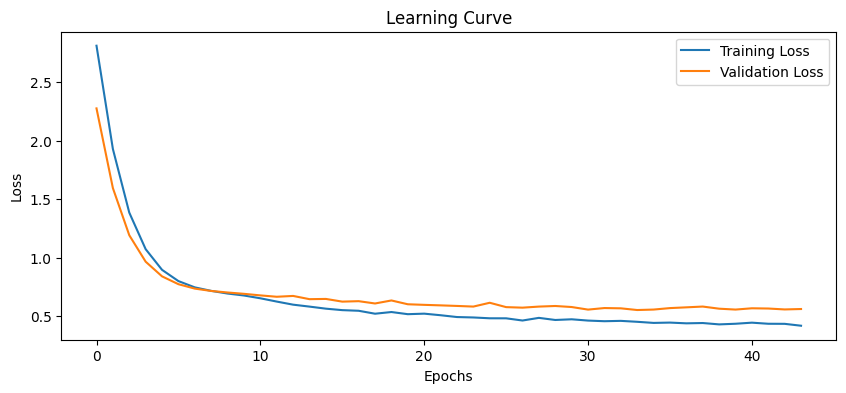

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(hist.history["loss"], label="Training Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.legend()
plt.show()

# Evalutate model

In [30]:
model.evaluate(xtrain, ytrain)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9469 - loss: 0.4134


[0.4260270595550537, 0.9424999952316284]

In [31]:
model.evaluate(xtest, ytest)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.8132 - loss: 0.6385


[0.6144489049911499, 0.8149999976158142]

In [33]:
yprob_train = model.predict(xtrain)
yprob_train[0:5]

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[0.09643372],
       [0.8902161 ],
       [0.04070012],
       [0.06366198],
       [0.95702976]], dtype=float32)

In [37]:
ypred_train = (yprob_train >= 0.5).astype(int).flatten()
ypred_train[0:5]

array([0, 1, 0, 0, 1])

In [38]:
ytrain.head()

,Liked
29,0
535,1
695,0
557,0
836,1


In [40]:
yprob_test = model.predict(xtest)
yprob_test[0:5]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


array([[0.3028122 ],
       [0.9307845 ],
       [0.9445653 ],
       [0.94886726],
       [0.5407055 ]], dtype=float32)

In [41]:
ypred_test = (yprob_test >= 0.5).astype(int).flatten()
ypred_test[0:5]

array([0, 1, 1, 1, 1])

In [42]:
ytest.head()

,Liked
521,1
737,1
740,1
660,1
411,1


# Save the objects
tfidf, svd, model

In [52]:
import joblib

joblib.dump(tfidf, "tfidf.joblib")

['tfidf.joblib']

In [53]:
joblib.dump(svd, "svd.joblib")

['svd.joblib']

In [54]:
model.save("sentiment_model.keras")

# Loading the files

In [55]:
tfidf = joblib.load("tfidf.joblib")
tfidf

TfidfVectorizer()

In [56]:
svd = joblib.load("svd.joblib")
svd

TruncatedSVD(n_components=300)

In [57]:
from keras.models import load_model

model = load_model("sentiment_model.keras")
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        38,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 140,549 (549.02 KB)

 Trainable params: 46,849 (183.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 93,700 (366.02 KB)

# Out of sample prediction

In [47]:
def analyse_sentiment(model, tfidf, svd):
  text = input("Please write the review : ")
  text = preprocess_text(text)
  text_pre = tfidf.transform([text]).toarray()
  text_pre_red = svd.transform(text_pre)
  yprob = model.predict(text_pre_red)
  if yprob >= 0.5:
    print("Positive sentiment")
    ypred = 1
  else:
    print("Negative sentiment")
    ypred = 0
  return ypred, yprob

In [48]:
analyse_sentiment(model, tfidf, svd)

Please write the review : Amazing Restaurant! really liked the service..
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Positive sentiment


(1, array([[0.9351821]], dtype=float32))

In [49]:
analyse_sentiment(model, tfidf, svd)

Please write the review : Didnt like taste , the service was too slow
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Negative sentiment


(0, array([[0.05449149]], dtype=float32))

In [50]:
analyse_sentiment(model, tfidf, svd)

Please write the review : Wow!... This book i read was really good
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Positive sentiment


(1, array([[0.83658016]], dtype=float32))

In [51]:
analyse_sentiment(model, tfidf, svd)

Please write the review : The service was ok, Average restaurant
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Negative sentiment


(0, array([[0.32683006]], dtype=float32))